# Работа с историческими данными пары BTC-USD

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
from matplotlib.pylab import date2num
import mpl_finance as mpf
import plotly.graph_objects as go

## EDA

In [2]:
# загрузим данные, посмотрим на них
data=pd.read_csv('bitcoin 2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Посмотрим на пропущенные значения.
data.isna().count()

Timestamp            4857377
Open                 4857377
High                 4857377
Low                  4857377
Close                4857377
Volume_(BTC)         4857377
Volume_(Currency)    4857377
Weighted_Price       4857377
dtype: int64

In [4]:
# удалим порпущенные, по онисанию в дни пропущенных значений не было торгов
# есть еще вариант заполнить пустые значения соседними...
# data['Volume_(BTC)'].fillna(data['Volume_(BTC)'].mean(),inplace=True)
# data['High'].fillna(method='ffill', inplace=True)
data.dropna(inplace=True)
print('Записей в нашем датасете после удаления NaN :', data.shape[0])

Записей в нашем датасете после удаления NaN : 3613769


In [5]:
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
data.index = data.Timestamp
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [6]:
# Дневные данные
data = data.resample('D').mean()
# Месячные данные
data_month = data.resample('M').mean()
# Квартальные данные 
data_Q = data.resample('Q-DEC').mean()
# Годовые данные
data_year = data.resample('A-DEC').mean()
# Квартальные данные 
data_Q = data.resample('Q-DEC').mean()

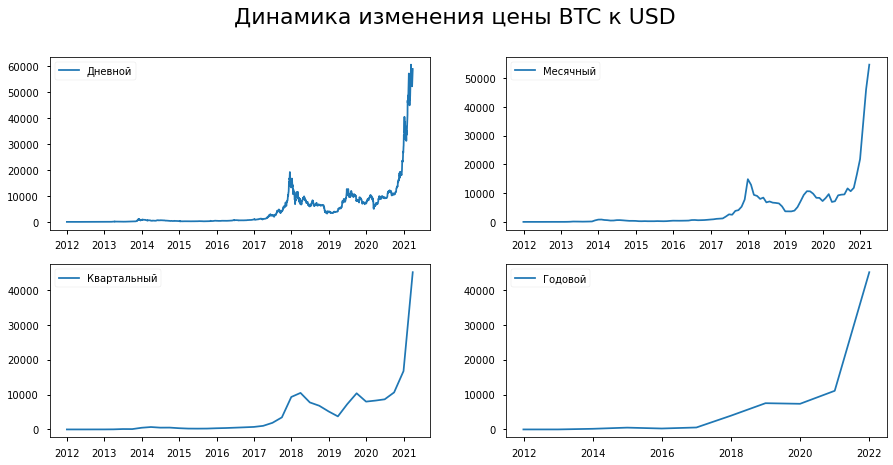

In [7]:
 
# посмотрим на динамику разных периодов
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Динамика изменения цены BTC к USD', fontsize=22)

plt.subplot(221)
plt.plot(data.Weighted_Price, '-', label='Дневной')
plt.legend()

plt.subplot(222)
plt.plot(data_month.Weighted_Price, '-', label='Месячный')
plt.legend()

plt.subplot(223)
plt.plot(data_Q.Weighted_Price, '-', label='Квартальный')
plt.legend()

plt.subplot(224)
plt.plot(data_year.Weighted_Price, '-', label='Годовой')
plt.legend()

plt.show()

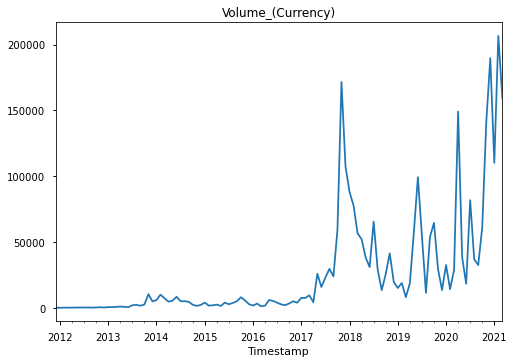

In [8]:
# любопытно посмотреть на динамику изменения объема торгов
data["Volume_(Currency)"].asfreq('M').plot() 
plt.title('Volume_(Currency)')
plt.show()

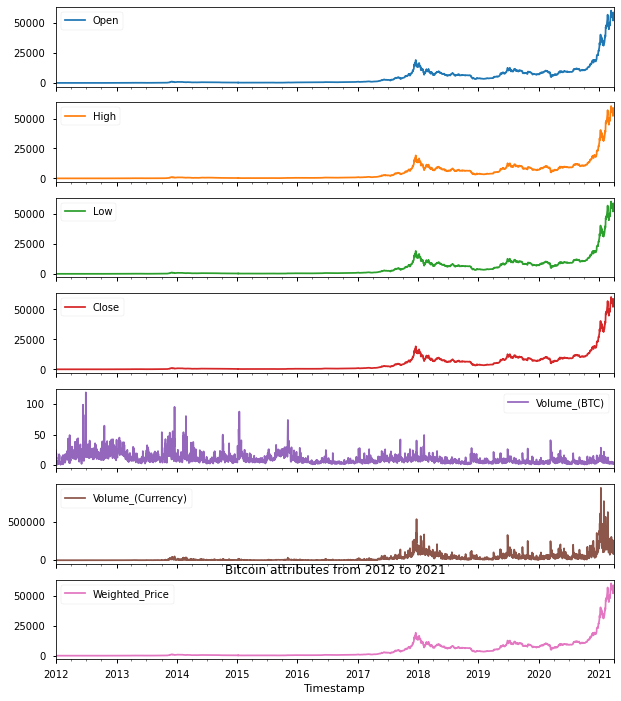

In [9]:
# посмотрим на все столбцы нашего dataframe
data.plot(subplots=True, figsize=(10,12))
plt.title('Bitcoin attributes from 2012 to 2021')
plt.show()

In [10]:
# посмотрим на свечной график
fig = go.Figure(data=go.Ohlc(x=data.index,
                    open=data['2021'].Open,
                    high=data['2021'].High,
                    low=data['2021'].Low,
                    close=data['2021'].Close))
fig.show()

<ipython-input-10-6160c04140b3>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  open=data['2021'].Open,
<ipython-input-10-6160c04140b3>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  high=data['2021'].High,
<ipython-input-10-6160c04140b3>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  low=data['2021'].Low,
<ipython-input-10-6160c04140b3>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and wi

__Проверим наш ряд на стационарность__ (и так все ясно, но будем матемтически строги). Воспользуемся тестом Дики-Фуллера, за H0 принимаем что наш ряд НЕ стационарен, за H1 принимаем что он стационарен.

In [11]:
from statsmodels.tsa.stattools import adfuller
adfuller_test = adfuller(data_month["Weighted_Price"])
print('p-value: '  ,adfuller_test[1])

p-value:  0.998862516832895


__Принимаем нашу H0 и считаем, что наш ряд НЕ стационарен.__  
Посмотрим на аддитивную декомпозицию нашего ряда.

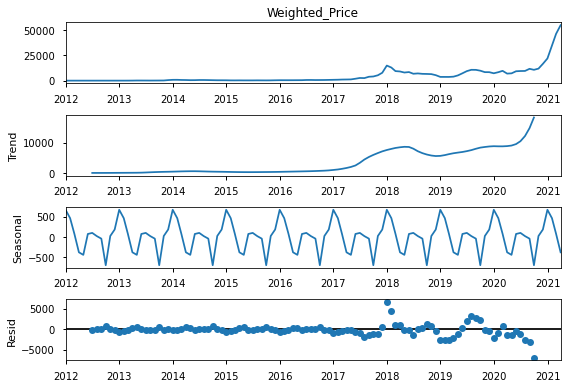

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_month['Weighted_Price'], model='additive')
result.plot()
plt.show()

### __Сделаем наш ряд стационарным.__  
Продифференцируем наш ряд на примере столбца Weighted_Price и посмотрим на него.

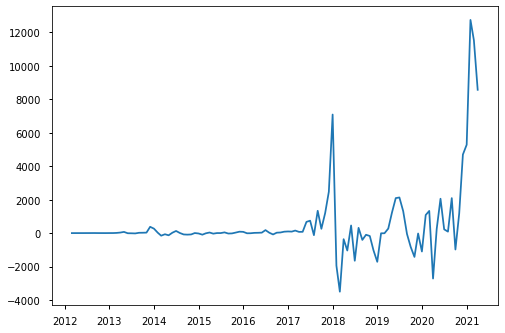

In [37]:
data_month['WP_diff']=data_month['Weighted_Price']-data_month['Weighted_Price'].shift(1)
data_month.dropna(inplace=True)
plt.plot(data_month.WP_diff, '-', label='WP_diff')

Посомтрим, что может дать логарифмирование (как частный случай преобразования Бокса-Кокса).


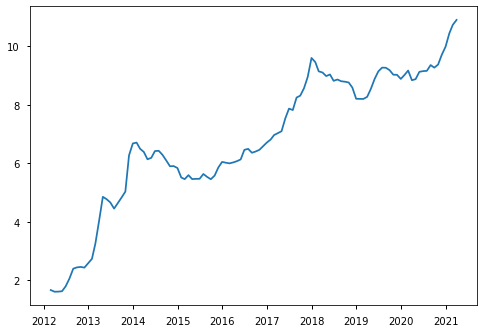

In [38]:
data_month['WP_log']=np.log(data_month['Weighted_Price'])
data_month.dropna(inplace=True)
plt.plot(data_month.WP_log, '-', label='WP_log')

Продифференцируем отлогарифмированный ряд.

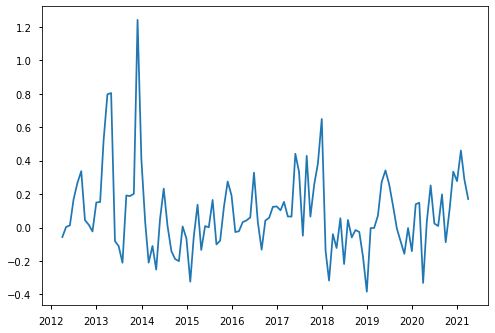

In [39]:
data_month['WP_log_diff']=data_month['WP_log']-data_month['WP_log'].shift(1)
data_month.dropna(inplace=True)
plt.plot(data_month.WP_log_diff, '-', label='WP_log_diff')

In [40]:
# проверимся Дики-Фуллером
adfuller_test = adfuller(data_month['WP_log_diff'])
print('p-value: '  ,adfuller_test[1])

p-value:  1.16114342136899e-08


Посмотрим, что может дать преобразование Бокса-Кокса.

p-value:  0.8798651293007629


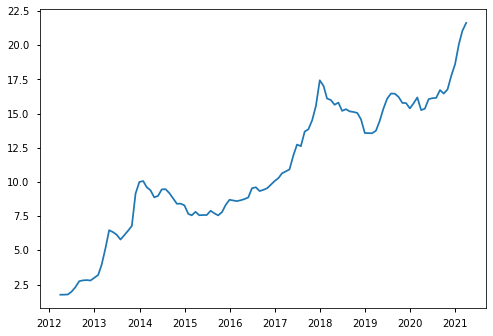

In [43]:
from scipy import stats
data_month['WP_bc'], lmbda = stats.boxcox(data_month.Weighted_Price)
adfuller_test = adfuller(data_month['WP_bc'])
print('p-value: '  ,adfuller_test[1])
plt.plot(data_month.WP_bc, '-', label='WP_bc')

p-value:  7.1599924844753115e-09


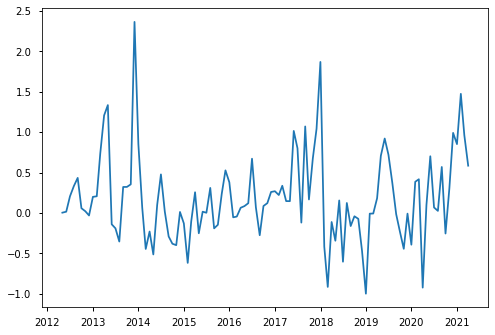

In [45]:
data_month['WP_bc_diff']=data_month['WP_bc']-data_month['WP_bc'].shift(1)
data_month.dropna(inplace=True)
adfuller_test = adfuller(data_month['WP_bc_diff'])
print('p-value: '  ,adfuller_test[1])
plt.plot(data_month.WP_bc_diff, '-', label='WP_bc')

Попорбуем сделать сезонное дифференцирование, после преобразования Бокса-Кокса, с лагом 12 и повторное дифференцирование с лагом 1.

p-value:  0.17185549934956812


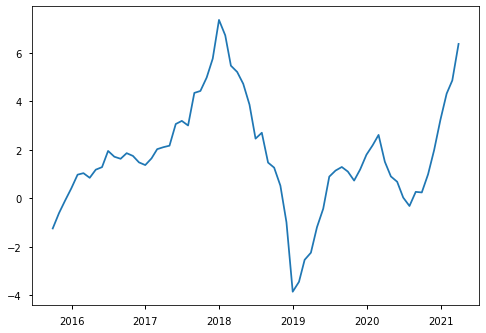

In [57]:
data_month['WP_bc_diff_seas']=data_month['WP_bc']-data_month['WP_bc'].shift(12)
data_month.dropna(inplace=True)
adfuller_test = adfuller(data_month['WP_bc_diff_seas'])
print('p-value: '  ,adfuller_test[1])
plt.plot(data_month.WP_bc_diff_seas, '-', label='WP_bc_diff_seas')

p-value:  0.00023024001376035634


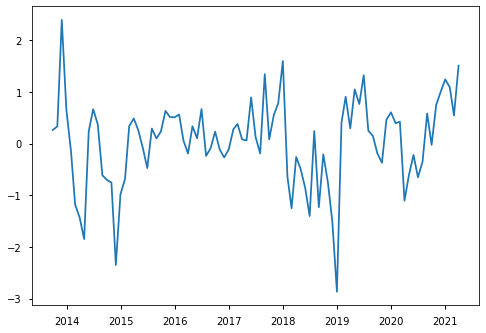

In [51]:
data_month['WP_bc_diff2_seas']=data_month['WP_bc_diff_seas']-data_month['WP_bc_diff_seas'].shift(1)
data_month.dropna(inplace=True)
adfuller_test = adfuller(data_month['WP_bc_diff2_seas'])
print('p-value: '  ,adfuller_test[1])
plt.plot(data_month.WP_bc_diff2_seas, '-', label='WP_bc_diff2_seas')

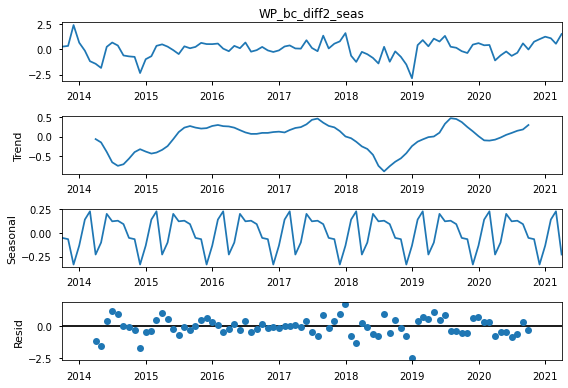

In [55]:
result = seasonal_decompose(data_month.WP_bc_diff2_seas, model='additive')
result.plot()
plt.show()

### __EDA результаты:__  
1. Изначально ряд НЕстационарен.  
2. Логарифмирование (в т.ч. преобразование Бокса-Кокса) и дифференцирование позволяют привести его к стационарному, уменьшить дисперсию.